# Project: 3-Year Recidivism for Offenders Released from Iowa Prison
#### Iowa Correctional System - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4

## Module 1: Data Exploration, Visualization and Cleaning

This dataset reports whether an offender is re-admitted to prison or not within three years from being released from prison in Iowa. The recidivism reporting year is the fiscal year (year ending June 30) marking the end of the three year tracking period.

The Department of Corrections uses recidivism as an indicator on whether strategies are reducing offenders relapse into criminal behavior. A three year time frame is used as studies have shown if an offender relapses into criminal behavior it is most likely to happen within three years of being released.

Data Attributes
* Fiscal Year Released,Fiscal year (year ending June 30) for which the offender was released from prison.,Number
* Recidivism Reporting Year,Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example  offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.,Number
* Main Supervising District,The Judicial District supervising the offender for the longest time during the tracking period.,Plain Text
* Release Type,Reasoning for Offender's release from prison.,Plain Text
* Race - Ethnicity,Offender's Race and Ethnicity,Plain Text
* Age At Release,Offender's age group at release from prison.,Plain Text
* Sex,Gender of our offender,Plain Text
* Offense Classification,Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days,Plain Text
* Offense Type,General category for the most serious offense for which the offender was placed in prison.,Plain Text
* Offense Subtype,Further classification of the most serious offense for which the offender was placed in prison.,Plain Text
* Return to Prison,No = Did not return to prison within the three year tracking period; Yes = Admitted to prison for any reason within the three year tracking period,Plain Text
* Days to Return,Number of days it took before the offender returned to prison.,Number
* Recidivism Type,Indicates the reason for return to prison.,Plain Text
* New Offense Classification,New conviction maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days,Plain Text
* New Offense Type,General category for the new conviction while the offender is out of prison.,Plain Text
* New Offense Sub Type,Further classification of the new conviction.,Plain Text
* Target Population,The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole.,Plain Text

### Data Access
##### Read raw data and prepare data for analysis 

In [1]:
# Imports for project
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv file to dataframe
df = pd.read_csv('data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year Released        26020 non-null  int64  
 1   Recidivism Reporting Year   26020 non-null  int64  
 2   Main Supervising District   16439 non-null  object 
 3   Release Type                24258 non-null  object 
 4   Race - Ethnicity            25990 non-null  object 
 5   Age At Release              26017 non-null  object 
 6   Sex                         26017 non-null  object 
 7   Offense Classification      26020 non-null  object 
 8   Offense Type                26020 non-null  object 
 9   Offense Subtype             26020 non-null  object 
 10  Return to Prison            26020 non-null  object 
 11  Days to Return              8681 non-null   float64
 12  Recidivism Type             26020 non-null  object 
 13  New Offense Classification  671

In [3]:
# Modify column names to remove spaces
df.columns = [col.lower().replace(' ','_').replace('e_','e').replace('_-_','_').replace('-_','_') for col in df.columns]
df.columns
df[['return_to_prison', 'days_to_return','recidivism_type', 'target_population']].tail(200)

,return_to_prison,days_to_return,recidivism_type,target_population
25820,Yes,66.0,Tech,Yes
25821,Yes,824.0,New,Yes
25822,Yes,264.0,New,Yes
25823,Yes,575.0,New,Yes
25824,Yes,347.0,New,Yes
...,...,...,...,...
26015,Yes,166.0,New,No
26016,Yes,1016.0,New,Yes
26017,Yes,252.0,Tech,Yes
26018,Yes,798.0,New,Yes


In [4]:
# Review unique data items in each column
for col in df.columns:
    print(col, df[col].unique(),"\n")

fiscal_year_released [2010 2014 2011 2012 2013 2015] 

recidivism_reporting_year [2013 2017 2014 2015 2016 2018] 

main_supervising_district ['6JD' '4JD' '7JD' nan '1JD' '2JD' '8JD' '5JD' '3JD' 'Interstate Compact'
 'ISC'] 

releasetype ['Parole' 'Discharged – End of Sentence' 'Special Sentence' nan
 'Interstate Compact Parole' 'Parole Granted'
 'Discharged - Expiration of Sentence' 'Paroled w/Immediate Discharge'
 'Paroled to Detainer - U.S. Marshall'
 'Paroled to Detainer - Out of State' 'Released to Special Sentence'
 'Paroled to Detainer - INS' 'Paroled to Detainer - Iowa'] 

race_ethnicity ['White - Non-Hispanic' 'Black - Non-Hispanic'
 'American Indian or Alaska Native - Non-Hispanic' 'White - Hispanic'
 'American Indian or Alaska Native - Hispanic'
 'Asian or Pacific Islander - Non-Hispanic' 'White -' 'Black -'
 'Black - Hispanic' 'Asian or Pacific Islander - Hispanic' 'N/A -' nan] 

ageat_release ['25-34' '45-54' 'Under 25' '35-44' '55 and Older' nan] 

sex ['Male' 'Female' nan

### Data Exploration
#### Exploring the data with Visualizations

<AxesSubplot:title={'center':'Offenders by Age'}, xlabel='ageat_release'>

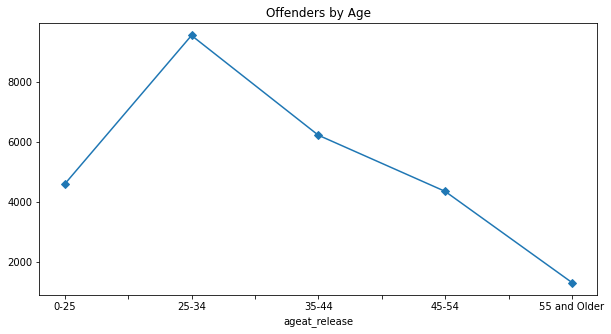

In [5]:
# Offenders by Age
df.loc[df['ageat_release'] == 'Under 25', 'ageat_release'] ='0-25'
series = df.groupby("ageat_release").fiscal_year_released.count()
series.plot(kind="line", marker='D', title="Offenders by Age", figsize=(10,5))

<AxesSubplot:title={'center':'Offense Types'}, xlabel='offensesubtype'>

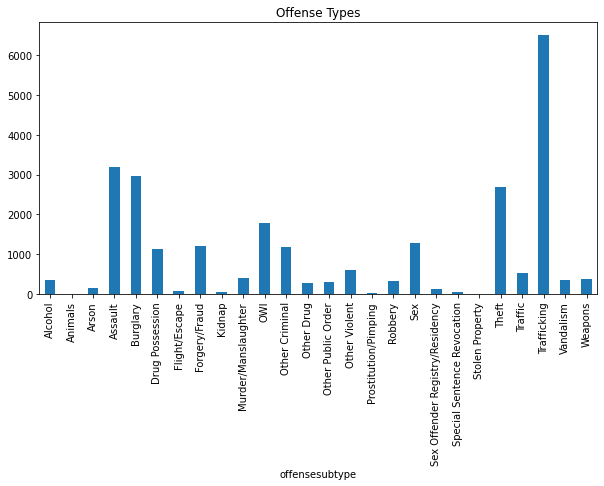

In [6]:
# Offense Types
series = df.groupby("offensesubtype").fiscal_year_released.count()
series.plot(kind="bar", title="Offense Types", figsize=(10,5))

<AxesSubplot:title={'center':'Male vs. Female Offenders'}, ylabel='fiscal_year_released'>

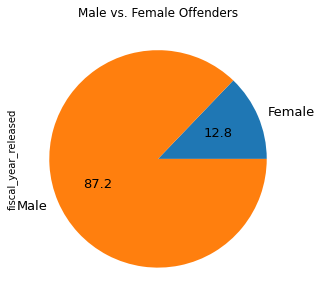

In [7]:
# Male vs. Female Offenders
series = df.groupby("sex").fiscal_year_released.count()
series.plot(kind="pie", title="Male vs. Female Offenders", figsize=(5,5), autopct='%.1f', fontsize=13)

<AxesSubplot:title={'center':'Offenders by Ethnicity'}, ylabel='race_ethnicity'>

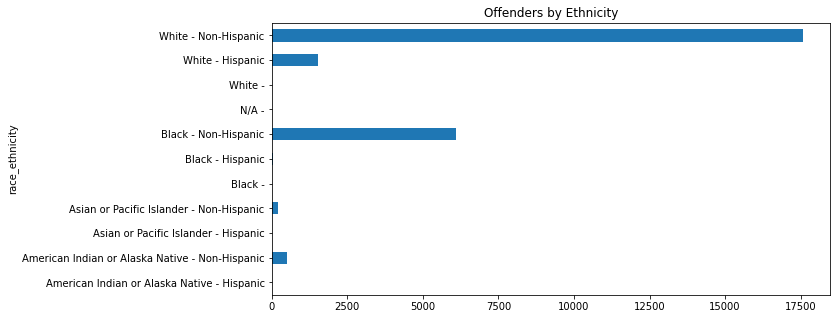

In [8]:
# Offenders by Ethnicity
series = df.groupby("race_ethnicity").fiscal_year_released.count()
series.plot(kind="barh", title="Offenders by Ethnicity", figsize=(10,5))

### Data Analysis and Cleaning
#### Basic data analysis for modelling

In [9]:
# How balanced is the dataset based on target attribute (Offenders returned v/s did not return)
print(df['return_to_prison'].value_counts(), "\n\n")

# How many rows in each column have null values
print(df.isna().sum())


No     17339
Yes     8681
Name: return_to_prison, dtype: int64 


fiscal_year_released             0
recidivism_reporting_year        0
main_supervising_district     9581
releasetype                   1762
race_ethnicity                  30
ageat_release                    3
sex                              3
offenseclassification            0
offensetype                      0
offensesubtype                   0
return_to_prison                 0
days_to_return               17339
recidivism_type                  0
new_offenseclassification    19302
new_offensetype              19302
new_offensesub_type          19321
target_population                0
dtype: int64


In [10]:
# Prepare dataset for classification problem
df_classification = df.drop(['days_to_return','new_offenseclassification', 'new_offensetype','new_offensesub_type'], axis=1)
df_classification.dropna(axis=0,inplace=True)

# How balanced is the final dataset
print("Yes: {}".format(len(df_classification[(df_classification.return_to_prison == 'Yes')])))
print("No: {}".format(len(df_classification[(df_classification.return_to_prison == 'No')])))

# Save dataframe to a csv file
df_classification.to_csv('offender_classification.csv') 

Yes: 6633
No: 9805


In [11]:
# Prepare dataset for regression problem
df_yes = df[(df.return_to_prison == 'Yes')]

# Remove 'main_supervising_district' column and all null 'new_offenseclassification' rows
df_yes = df_yes[df_yes['new_offenseclassification'].notna()]
df_yes.drop(['main_supervising_district'], axis = 1, inplace=True)

# Replace 'offense_sub_type'
df_yes.loc[df['new_offensesub_type'].isna(), 'new_offensesub_type'] = df['new_offensetype']

print(len(df_yes))
print(df_yes.isna().sum())

# Save dataframe to a csv file
df_yes.to_csv('recidivism_types.csv') 

6718
fiscal_year_released           0
recidivism_reporting_year      0
releasetype                  350
race_ethnicity                 0
ageat_release                  0
sex                            0
offenseclassification          0
offensetype                    0
offensesubtype                 0
return_to_prison               0
days_to_return                 0
recidivism_type                0
new_offenseclassification      0
new_offensetype                0
new_offensesub_type            0
target_population              0
dtype: int64
